# Naive Method

In [24]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [25]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """ 
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [26]:
stock_cleaned_data=pd.read_csv('../data/stock_cleaned_data.csv', index_col = 0)
stock_cleaned_data.head()

,open,high,low,close,adjclose,volume
date,,,,,,
1999-11-01,136.500000,137.000000,135.562500,135.562500,88.217185,4006500
1999-11-02,135.968704,137.250000,134.593704,134.593704,87.586742,6516900
1999-11-03,136.000000,136.375000,135.125000,135.500000,88.176513,7222300
1999-11-04,136.750000,137.359299,135.765594,136.531204,88.847568,7907500
1999-11-05,138.625000,139.109299,136.781204,137.875000,89.722043,7431500


In [27]:
data=stock_cleaned_data.filter(['close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
test_data_len=len(dataset) - training_data_len
print("testing data size:", test_data_len)

test_data = dataset[-test_data_len:, : ]

testing data size: 1180


In [28]:
initial_forecast = dataset[training_data_len-1]
naive_pred = [initial_forecast]

for i in range(0, test_data_len-1):
    naive_pred.append(test_data[i])

print("RMSE\t:", calculate_rmse(test_data,naive_pred))

RMSE	: 4.617054503483318


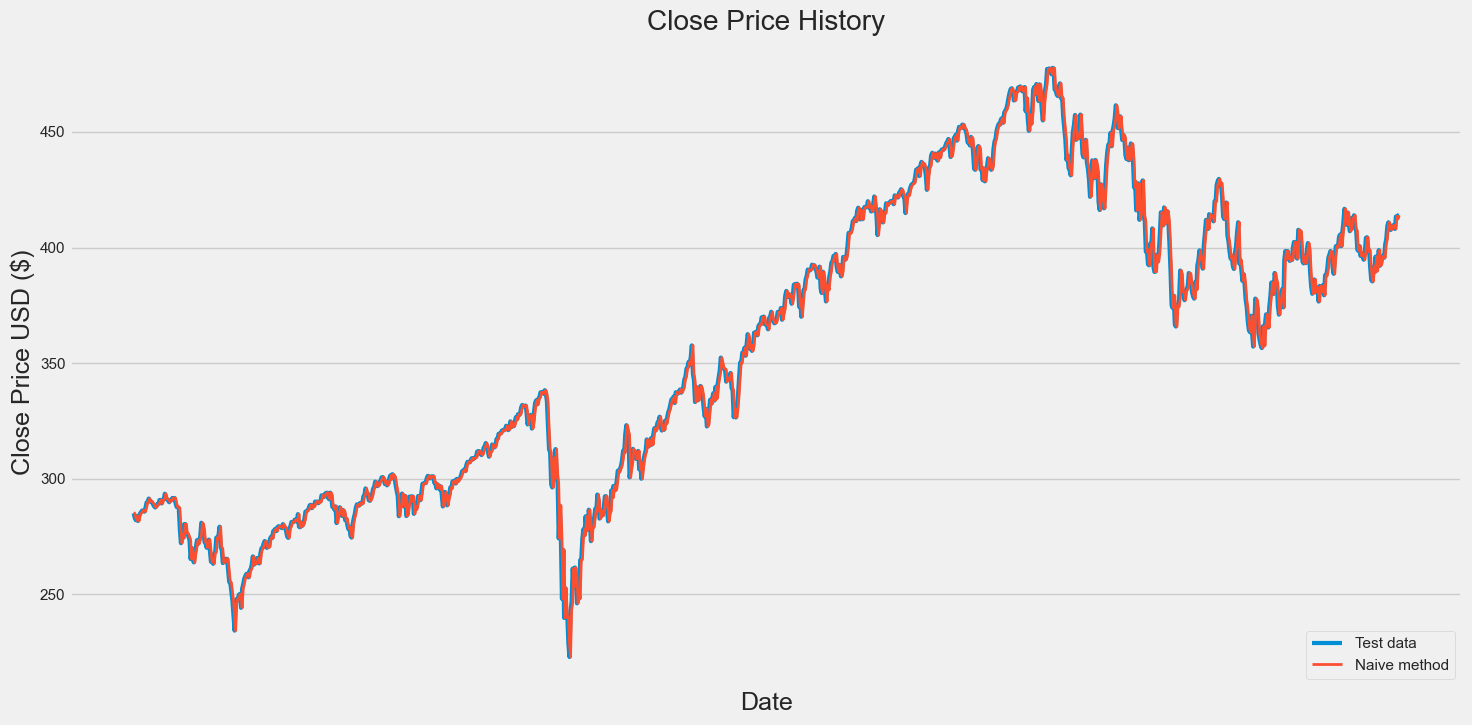

In [29]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(test_data, linewidth=3)
plt.plot(naive_pred, linewidth=2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(['Test data', 'Naive method'],loc='lower right')
plt.xticks([])
plt.show()